In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from sklearn.datasets import make_blobs, make_moons, make_circles


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate class 0 (label 0)
class0_x = np.random.normal(2, 1, 50)  # Features for class 0 (mean=2)
class0_y = np.random.normal(2, 1, 50)

# Generate class 1 (label 1)
class1_x = np.random.normal(6, 1, 50)  # Features for class 1 (mean=6)
class1_y = np.random.normal(6, 1, 50)

# Combine data into features (X) and labels (y)
X = np.vstack([
    np.column_stack((class0_x, class0_y)),
    np.column_stack((class1_x, class1_y))
])
y = np.hstack([np.zeros(50), np.ones(50)])


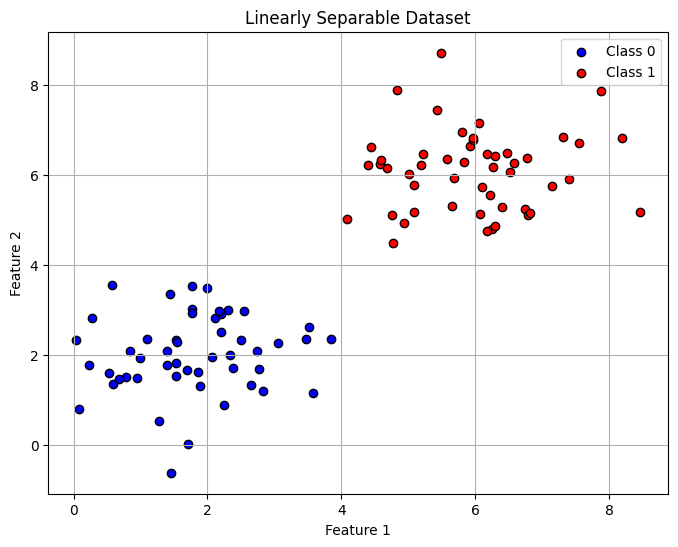

In [5]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def phi(x):
    # return jnp.tanh(x)
    pass

def kernel(x_k, x):
    # return jnp.tanh(jnp.dot(x1, x2))
    pass

def kernel_2(x1, x2):
    np.sum(phi(x1) * phi(x2))

def kernel_polynomial(x1, x2, d=3):
    return (1 + jnp.dot(x1, x2)) ** d

def kernel_gaussian(x1, x2, sigma=1.0):
    return jnp.exp(-jnp.linalg.norm(x1 - x2) ** 2 / (2 * sigma ** 2))

dual_parameters = np.random.randn(X.shape[0])


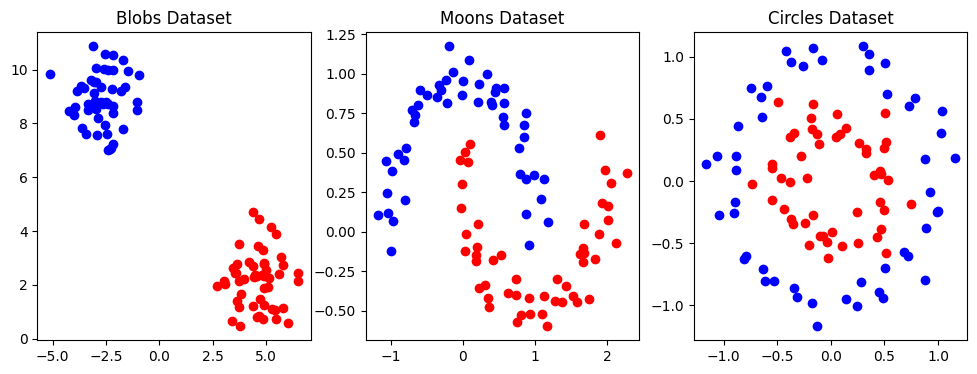

In [7]:
x_blob, y_blob = make_blobs(n_samples=100, centers=2, random_state=42)
x_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)
x_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Blobs Dataset')
plt.plot(x_blob[y_blob == 0, 0], x_blob[y_blob == 0, 1], 'bo', label='Class 0')
plt.plot(x_blob[y_blob == 1, 0], x_blob[y_blob == 1, 1], 'ro', label='Class 1')
plt.subplot(1, 3, 2)
plt.title('Moons Dataset')
plt.plot(x_moons[y_moons == 0, 0], x_moons[y_moons == 0, 1], 'bo', label='Class 0')
plt.plot(x_moons[y_moons == 1, 0], x_moons[y_moons == 1, 1], 'ro', label='Class 1')
plt.subplot(1, 3, 3)
plt.title('Circles Dataset')
plt.plot(x_circles[y_circles == 0, 0], x_circles[y_circles == 0, 1], 'bo', label='Class 0')
plt.plot(x_circles[y_circles == 1, 0], x_circles[y_circles == 1, 1], 'ro', label='Class 1')


In [8]:
## MAXIMIZING THE MARGININ THE DIRECTSPACE
"""
min ||w||^2
 w

under condition yk(w^T * xk + b) >= 1
"""

## MAXIMIZING THE MARGIN IN THE DUAL SPACE
"""
min 1/2 ||alpha||^2
s.t. sum(yk * alpha_k) = 0
     0 <= alpha_k <= C
"""

'\nmin 1/2 ||alpha||^2\ns.t. sum(yk * alpha_k) = 0\n     0 <= alpha_k <= C\n'

In [9]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_1 in enumerate(X):
                condition = y_[idx]*(np.dot(x_1, self.w) - self.b) >=1 
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_1, y_[idx]))
                    self.b -= self.lr * y_[idx]
        
        return self.w, self.b
        
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [10]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()


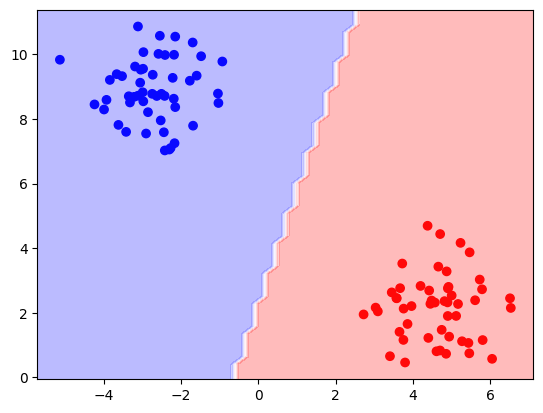

In [11]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(x_blob, y_blob)

plot_decision_boundary(x_blob, y_blob, svm)

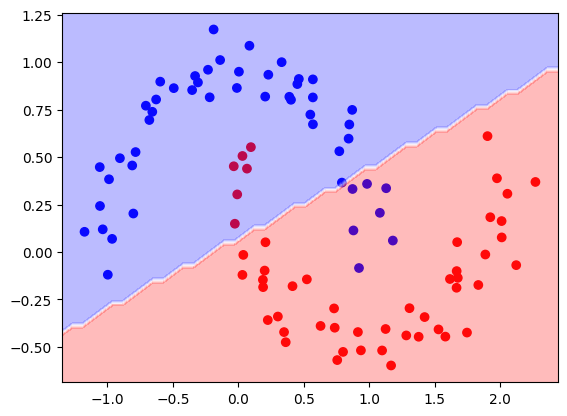

In [12]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(x_moons, y_moons)
plot_decision_boundary(x_moons, y_moons, svm)

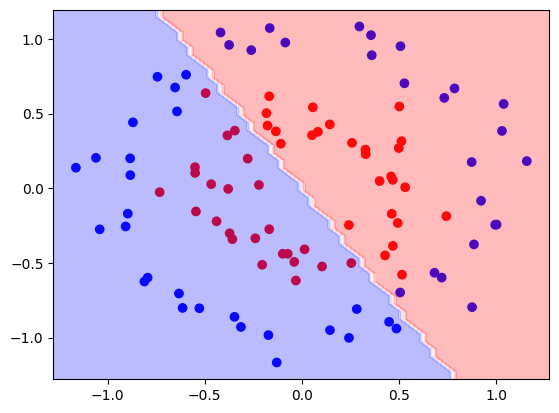

In [13]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(x_circles, y_circles)
plot_decision_boundary(x_circles, y_circles, svm)

# SVM with kernel 
## Dual Space 

In [20]:
class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=600, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernal # for guassian

    def polynomial_kernal(self,X,Z):
        return (self.c + X.dot(Z.T))**self.degree #(c + X.y)^degree
        
    def gaussian_kernal(self, X,Z):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2) #e ^-(1/ σ2) ||X-y|| ^2
    
    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0]) 

        y_mul_kernal = np.outer(y, y) * self.kernel(X, X) # yi yj K(xi, xj)

        for i in range(self.epoches):
            gradient = self.ones - y_mul_kernal.dot(self.alpha) # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            self.alpha[self.alpha > self.C] = self.C # 0<α<C
            self.alpha[self.alpha < 0] = 0 # 0<α<C

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            
        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        
        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(X, X[index])))

        self.b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }
            
    def predict(self, X):
        return np.sign(self.decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

Accuracy:  0.5


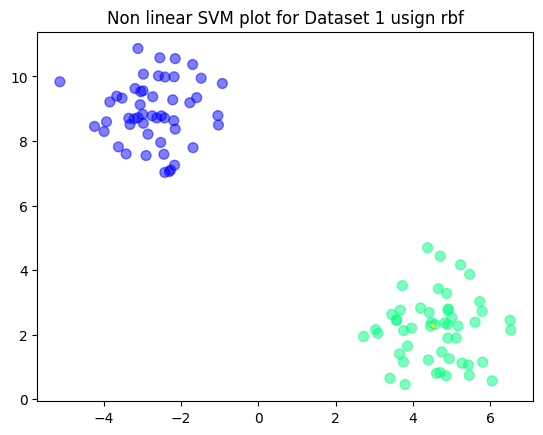

In [21]:
svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.train(x_blob,y_blob)
print("Accuracy: ", svm_dual1.score(x_blob, y_blob))
svm_dual1.plot('Non linear SVM plot for Dataset 1 usign rbf')

Accuracy:  0.5


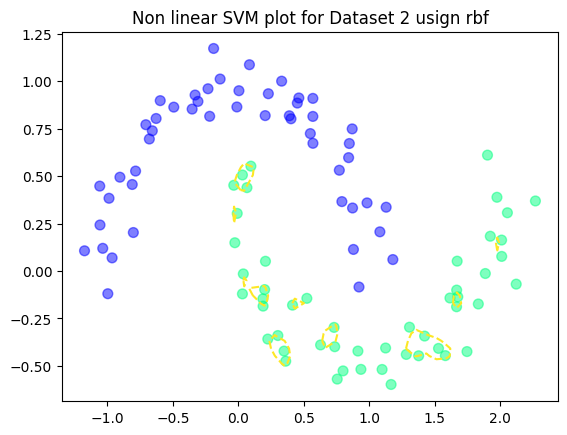

In [22]:
svm_dual2 = SVM_Dual(kernel = 'rbf')
svm_dual2.train(x_moons,y_moons)
print("Accuracy: ", svm_dual2.score(x_moons,y_moons))
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')

Accuracy:  0.5


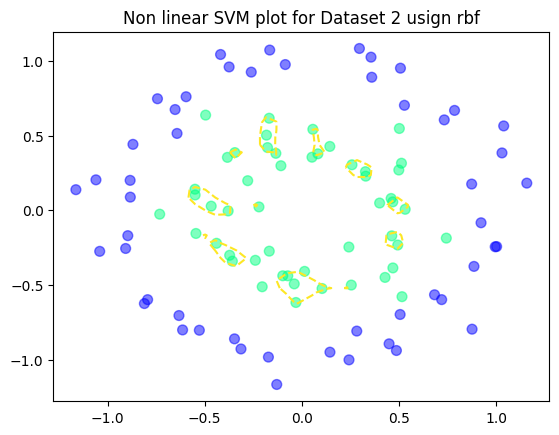

In [23]:
svm_dual2 = SVM_Dual(kernel = 'rbf')
svm_dual2.train(x_circles,y_circles)
print("Accuracy: ", svm_dual2.score(x_circles,y_circles))   
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')